<a href="https://www.kaggle.com/code/brunobrazda/flowerclass-91-val-accuracy-with-efficientnet-b5?scriptVersionId=94564728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install split-folders

import splitfolders
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from scipy import misc
from shutil import copyfile
import matplotlib.pyplot as plt
import keras as keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model,load_model,Sequential
import pandas as pd

In [2]:
splitfolders.ratio('/kaggle/input/flowers-recognition/flowers', output="output", seed=42, ratio=(.8, 0.2)) 

Copying files: 4317 files [00:28, 149.21 files/s]


In [3]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.15,
    zoom_range=0.2,
    #fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=r"output/train/",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=12,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    directory=r"output/val/",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=12,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


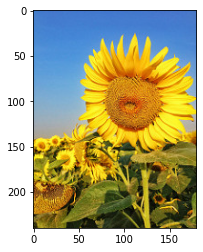

In [4]:
img = plt.imread('/kaggle/input/flowers-recognition/flowers/sunflower/10541580714_ff6b171abd_n.jpg')
imgplot = plt.imshow(img)

In [5]:
model_name = 'EfficientNetB5'
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False,
                                                               weights='imagenet',
                                                               input_shape=(150,150,3),
                                                               pooling='max')
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001 )(x)
x=Dense(512,
        kernel_regularizer = regularizers.l2(l=0.013),
        activity_regularizer=regularizers.l1(0.007),
        bias_regularizer=regularizers.l1(0.006),
        activation = 'relu')(x)

x=Dropout(rate=.44,seed=42)(x)

output=Dense(5,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=output)
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


2022-05-02 11:41:59.533248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 11:41:59.639518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 11:41:59.640694: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 11:41:59.642606: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

115277824/115263384 [==============================] - 4s 0us/step


In [6]:
history=model.fit(train_generator,epochs=5,verbose=2,validation_data=validation_generator)

2022-05-02 11:42:12.559336: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-05-02 11:42:39.093608: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


288/288 - 108s - loss: 11.2166 - accuracy: 0.6689 - val_loss: 8.8700 - val_accuracy: 0.8509
Epoch 2/5
288/288 - 72s - loss: 6.9374 - accuracy: 0.8134 - val_loss: 5.4465 - val_accuracy: 0.8809
Epoch 3/5
288/288 - 71s - loss: 4.5606 - accuracy: 0.8473 - val_loss: 3.5891 - val_accuracy: 0.9087
Epoch 4/5
288/288 - 71s - loss: 2.9620 - accuracy: 0.9030 - val_loss: 2.3253 - val_accuracy: 0.9191
Epoch 5/5
288/288 - 71s - loss: 1.9821 - accuracy: 0.9102 - val_loss: 1.5706 - val_accuracy: 0.9272


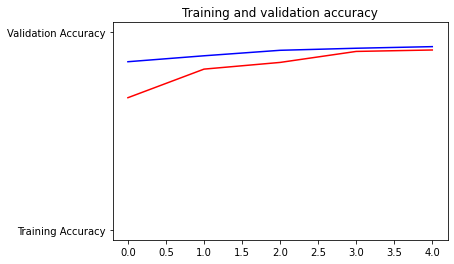

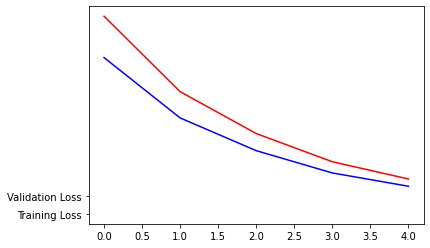

In [7]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

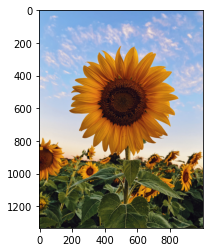

In [8]:
img = plt.imread('../input/testing-images/sunflower.jpeg')
imgplot = plt.imshow(img)
img = tf.image.resize(images=img,size=(150,150))
img = tf.expand_dims(img, axis=0)

In [9]:
flower_names = []
for key in train_generator.class_indices.keys():
    flower_names.append(key)
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
pred = model.predict(img)
index = np.argmax(pred[0])

print("This flower is a " + str(flower_names[index]) + ". The probability is " + str(round((pred[0][index]*100),2)) + '%.')


This flower is a sunflower. The probability is 91.36%.
